In [ ]:
from google.colab import drive
drive.mount('/drive')
%cd /drive

Mounted at /drive
/drive


In [ ]:
%cd MyDrive/
!ls

/drive/MyDrive
'Colab Notebooks'		      Fashion-MNIST	    VGG16
'Eğitim - enesusta.com.tr'	      fikir.gdoc	    YAPAYZEKA.pptx
'Facial Expression Recognition'       save_models
'Facial Expression Recognitiondata'  'Slience Of Night V'


In [ ]:
%cd Facial Expression Recognition

/drive/MyDrive/Facial Expression Recognition


In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import keras
from keras.models import Sequential, Model, model_from_json
from keras.layers import Dense, Conv2D, Activation, MaxPool2D, Flatten, Dropout, BatchNormalization
from keras.utils import np_utils
from keras.preprocessing import image
from keras.callbacks import ModelCheckpoint

In [ ]:
root = '/drive/MyDrive/Facial Expression Recognition'
data = pd.read_csv(root+'/fer2013.csv')
data.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [ ]:
print('Shape:',data.shape)

Shape: (35887, 3)


In [ ]:
data['Usage'].value_counts()

Training       28709
PrivateTest     3589
PublicTest      3589
Name: Usage, dtype: int64

In [ ]:
np.unique(data['Usage'].values.ravel())
print('Egitim Setindeki Örnek Sayısı: %d'%len(data[data.Usage=="Training"]))

Egitim Setindeki Örnek Sayısı: 28709


In [ ]:
train_data = data[data.Usage == "Training"]
train_data.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [ ]:
train_pixels = train_data.pixels.str.split(" ").tolist()
train_pixels = pd.DataFrame(train_pixels, dtype=int)
train_images = train_pixels.values
train_images = train_images.astype(np.float)
print(train_images)
print(train_images.shape)

[[ 70.  80.  82. ... 106. 109.  82.]
 [151. 150. 147. ... 193. 183. 184.]
 [231. 212. 156. ...  88. 110. 152.]
 ...
 [ 74.  81.  87. ... 188. 187. 187.]
 [222. 227. 203. ... 136. 136. 134.]
 [195. 199. 205. ...   6.  15.  38.]]
(28709, 2304)


In [ ]:
def show(img):
  show_image = img.reshape(48, 48)
  plt.axis('off')
  plt.imshow(show_image, cmap='gray')


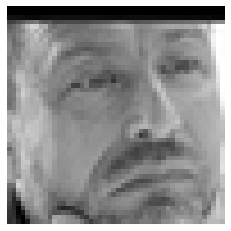

In [ ]:
show(train_images[1090])

In [ ]:
train_labels_flat = train_data["emotion"].values.ravel()
train_labels_count = np.unique(train_labels_flat).shape[0]
print('Farklı Yüz İfadelerinin Sayısı: %d'%train_labels_count)

Farklı Yüz İfadelerinin Sayısı: 7


In [ ]:
def dense_to_one_hot(labels_dense, num_classes):
  num_labels = labels_dense.shape[0]
  index_offset = np.arange(num_labels) * num_classes
  labels_one_hot = np.zeros((num_labels, num_classes))
  labels_one_hot.flat[index_offset + labels_dense.ravel()] = 1
  return labels_one_hot

In [ ]:
y_train = dense_to_one_hot(train_labels_flat,train_labels_count)
y_train = y_train.astype(np.uint8)
print(y_train.shape)

(28709, 7)


In [ ]:
np.unique(data["Usage"].values.ravel()) 

print('Test verisetindeki örnek sayısı: %d'%(len(data[data.Usage == "PublicTest"])))

Test verisetindeki örnek sayısı: 3589


In [ ]:
test_data = data[data.Usage == "PublicTest"] 
test_pixels = test_data.pixels.str.split(" ").tolist() 

test_pixels = pd.DataFrame(test_pixels, dtype=int)
test_images = test_pixels.values
test_images = test_images.astype(np.float)

print(test_images.shape)

(3589, 2304)


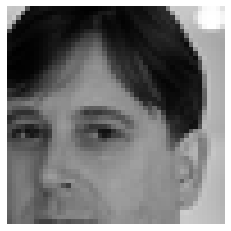

In [ ]:
show(test_images[2200])

In [ ]:
test_labels_flat = test_data["emotion"].values.ravel()
test_labels_count = np.unique(test_labels_flat).shape[0]

y_test = dense_to_one_hot(test_labels_flat, test_labels_count)

y_test = y_test.astype(np.uint8)

print(y_test.shape)

(3589, 7)


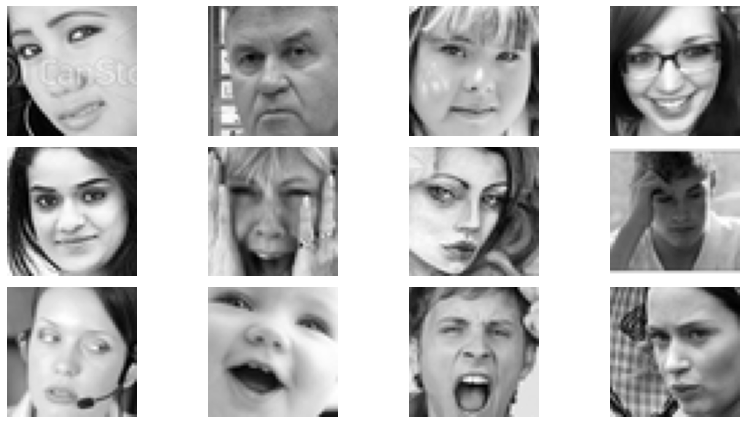

In [ ]:
plt.figure(0, figsize=(12,6))
for i in range(1,13):
  plt.subplot(3, 4, i)
  plt.axis('off')

  image = test_images[i].reshape(48,48)
  plt.imshow(image, cmap='gray')

plt.tight_layout()
plt.show()

In [ ]:
model = Sequential()

#1. KATMAN
model.add(Conv2D(256, (3,3), data_format="channels_last", kernel_initializer="he_normal", input_shape=(48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))

#2. KATMAN

model.add(Conv2D(128, (3,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=2))
model.add(Dropout(0.6)) #%60 unutma işlemi(nöron silme-dropout)

### 3. KATMAN
model.add(Conv2D(128, (3,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))


### 4. KATMAN
model.add(Conv2D(64, (3,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))

### 5. KATMAN
model.add(Conv2D(64, (3,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=2))
model.add(Dropout(0.40)) #%60 unutma işlemi(nöron silme-dropout)

model.add(Conv2D(32, (3,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=2))
model.add(Dropout(0.30)) #%60 unutma işlemi(nöron silme-dropout)

model.add(Conv2D(16, (3,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=2))
model.add(Dropout(0.60)) #%60 unutma işlemi(nöron silme-dropout)


### TAM BAĞLANTI KATMANI
model.add(Flatten())
model.add(Dense(128))
model.add(Dense(64))
model.add(Dense(32))
model.add(Dense(16))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.20))#%60 unutma işlemi(nöron silme-dropout)

### Çıkış katmanı

model.add(Dense(7))
model.add(Activation('softmax')) #Sınıflama işlemi (7 duygu sınıfı var)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) #opmizasyon ve başarım hesaplama metriklerinin belirlenmesi
#model özetini görselleştirelim

model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_140 (Conv2D)          (None, 46, 46, 256)       2560      
_________________________________________________________________
batch_normalization_145 (Bat (None, 46, 46, 256)       1024      
_________________________________________________________________
activation_152 (Activation)  (None, 46, 46, 256)       0         
_________________________________________________________________
conv2d_141 (Conv2D)          (None, 44, 44, 128)       295040    
_________________________________________________________________
batch_normalization_146 (Bat (None, 44, 44, 128)       512       
_________________________________________________________________
activation_153 (Activation)  (None, 44, 44, 128)       0         
_________________________________________________________________
max_pooling2d_71 (MaxPooling (None, 22, 22, 128)     

In [ ]:
x_train = train_images.reshape(-1, 48, 48, 1)
x_test = test_images.reshape(-1, 48, 48, 1)
print('Train:',x_train.shape)
print('Test:', x_test.shape)

Train: (28709, 48, 48, 1)
Test: (3589, 48, 48, 1)


In [ ]:
print('Train:',y_train.shape)
print('Test:', y_test.shape)

Train: (28709, 7)
Test: (3589, 7)


In [ ]:
# en başarılı agırlıları kaydet
checkpointer = ModelCheckpoint(filepath=root + 'data/face_model.h5', verbose=1, save_best_only=True)

epochs = 30
batchSize = 1000

#modeli çalıştır
hist = model.fit(x_train, y_train,
                 epochs=epochs,
                 shuffle=True, # karışık bir şekilde eğit
                 batch_size=batchSize,
                 validation_data=(x_test, y_test),
                 callbacks=[checkpointer],
                 verbose=1)

# model json olarak kaydetme

model_json = model.to_json()
with open(root+'data/face_model02.json', 'w') as json_file:
  json_file.write(model_json)

Epoch 1/30
29/29 [==============================] - 52s 1s/step - loss: 0.6448 - accuracy: 0.7670 - val_loss: 1.0842 - val_accuracy: 0.6300

Epoch 00001: val_loss improved from inf to 1.08425, saving model to /drive/MyDrive/Facial Expression Recognitiondata/face_model.h5
Epoch 2/30
29/29 [==============================] - 39s 1s/step - loss: 0.6297 - accuracy: 0.7704 - val_loss: 1.0859 - val_accuracy: 0.6266

Epoch 00002: val_loss did not improve from 1.08425
Epoch 3/30
29/29 [==============================] - 39s 1s/step - loss: 0.6126 - accuracy: 0.7776 - val_loss: 1.1119 - val_accuracy: 0.6286

Epoch 00003: val_loss did not improve from 1.08425
Epoch 4/30
29/29 [==============================] - 39s 1s/step - loss: 0.5994 - accuracy: 0.7845 - val_loss: 1.1135 - val_accuracy: 0.6297

Epoch 00004: val_loss did not improve from 1.08425
Epoch 5/30
29/29 [==============================] - 39s 1s/step - loss: 0.5960 - accuracy: 0.7843 - val_loss: 1.1288 - val_accuracy: 0.6258

Epoch 00005

KeyboardInterrupt: ignored

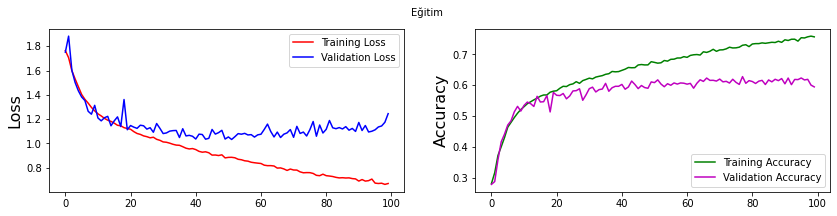

In [ ]:
plt.figure(figsize=(14,3))
plt.subplot(1, 2, 1)
plt.suptitle('Eğitim', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(hist.history['loss'], color ='r', label='Training Loss')
plt.plot(hist.history['val_loss'], color ='b', label='Validation Loss')
plt.legend(loc='upper right')


plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(hist.history['accuracy'], color ='g', label='Training Accuracy')
plt.plot(hist.history['val_accuracy'], color ='m', label='Validation Accuracy')
plt.legend(loc='lower right')

plt.show()

In [ ]:
test = data[['emotion', 'pixels']][data['Usage'] == 'PrivateTest']
test['pixels'] = test['pixels'].apply(lambda im: np.fromstring(im, sep=' '))
test.head()

,emotion,pixels
32298,0,"[170.0, 118.0, 101.0, 88.0, 88.0, 75.0, 78.0, ..."
32299,5,"[7.0, 5.0, 8.0, 6.0, 7.0, 3.0, 2.0, 6.0, 5.0, ..."
32300,6,"[232.0, 240.0, 241.0, 239.0, 237.0, 235.0, 246..."
32301,4,"[200.0, 197.0, 149.0, 139.0, 156.0, 89.0, 111...."
32302,2,"[40.0, 28.0, 33.0, 56.0, 45.0, 33.0, 31.0, 78...."


In [ ]:
x_test_private = np.vstack(test['pixels'].values)
y_test_private = np.array(test['emotion'])

In [ ]:
x_test_private = x_test_private.reshape(-1, 48, 48, 1)
y_test_private = np_utils.to_categorical(y_test_private)
x_test_private.shape, y_test_private.shape

((3589, 48, 48, 1), (3589, 7))

In [ ]:
score = model.evaluate(x_test_private, y_test_private, verbose=0)
print("Private Test Üzerindeki Doğruluk Durumu:", score)

Private Test Üzerindeki Doğruluk Durumu: [1.1362544298171997, 0.6255224347114563]


In [ ]:
from keras.models import load_model
from PIL import Image
from keras.preprocessing import image

In [ ]:
# en iyi ağırlıkları yükle
model_best = load_model(root + 'data/face_model.h5')

In [ ]:
  
def predict_file(file):

    #test_image=x_test_private[60] #eğer veri kümesinden bir görsel denemek isterseniz burada [] içine rastgele bir görsel numarası atayarak test edebilirsiniz!
    image_path = root+'/'+ file

    test_image_original = image.load_img(image_path) # orjinal renkli görüntü

    test_image = image.load_img(image_path, target_size=(48, 48), grayscale=True)
    test_data = image.img_to_array(test_image)

    test_data = np.expand_dims(test_data, axis=0)
    test_data = np.vstack([test_data])

    results = model_best.predict(test_data, batch_size=1)
    print(results)

    #sınıflarımız 7 adet duygu durumumuz
    class_names = ['angry', 'disgusted', 'scared', 'happy', 'sad', 'surprise', 'natural']

    ind = 0.1+0.6*np.arange(len(class_names))
    width = 0.4  #bar genişliği

    color_list = ['red','orangered','darkorange','limegreen','darkgreen','royalblue','navy']

    # test resmimizi çizdirelim

    plt.imshow(test_image_original)
    plt.title('Pictures', fontsize=16)
    plt.axis('off')
    plt.show()

    #sonuçlarımızı renklendirelim

    for i in range(len(class_names)):
      plt.bar(ind[i], results[0][i], width, color=color_list[i])

    plt.title("Classification Result", fontsize=20)
    plt.xlabel("Facial Expressions Category",fontsize=16)
    plt.ylabel("Classification Score",fontsize=16)
    plt.xticks(ind, class_names, rotation=45, fontsize=14)
    plt.show()


    print("\nClassification result with the highest rate:", class_names[np.argmax(results)])

    # en yüksek skorlu duyguya karşılık emoji çizdirelim

Test

In [ ]:
!ls

acun.png  elon2.png  fer2013.csv  kızgın.png   mutlu.png     üzülmüs.png
alex.png  elon.png   indir.png	  korkmuş.png  şaşırmış.png


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


[[6.8652011e-02 1.3248784e-04 6.4659774e-02 3.6725801e-01 1.7894945e-01
  8.2220398e-03 3.1212619e-01]]


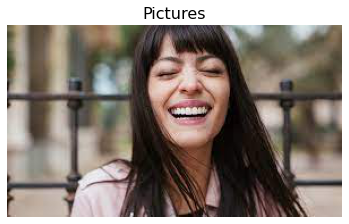

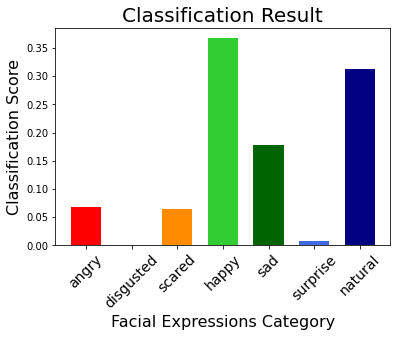


Classification result with the highest rate: happy


In [ ]:
predict_file('mutlu.png')

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


[[0.06292004 0.0009736  0.2018766  0.09445728 0.3938174  0.0204883
  0.22546683]]


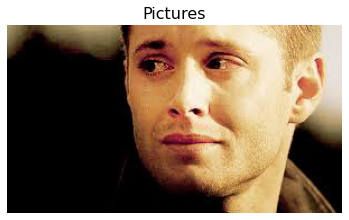

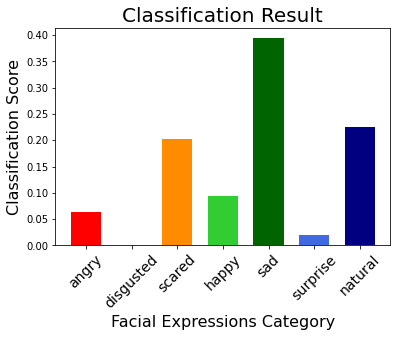


Classification result with the highest rate: sad


In [ ]:
predict_file('üzülmüs.png')

[[1.5237670e-01 2.5443381e-04 2.0757556e-02 7.0159703e-02 3.3476200e-02
  2.5399081e-02 6.9757634e-01]]


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


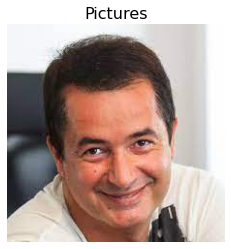

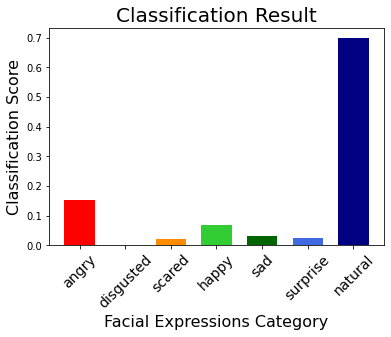


Classification result with the highest rate: natural


In [ ]:
predict_file('acun.png')

[[0.31735507 0.00080181 0.0889611  0.1030175  0.35980126 0.00090027
  0.12916298]]


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


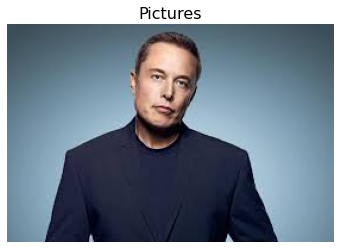

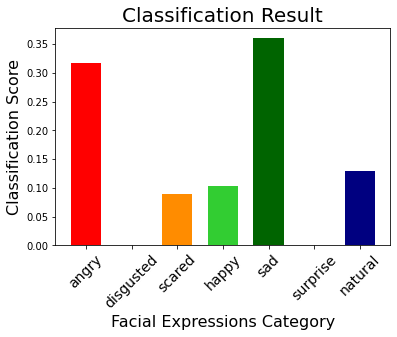


Classification result with the highest rate: sad


In [ ]:
predict_file('elon.png')

[[4.6279754e-02 7.0771290e-05 1.9710856e-02 4.1113675e-01 2.8313014e-01
  2.7262745e-04 2.3939909e-01]]


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


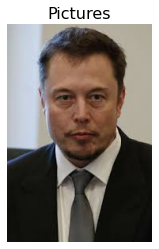

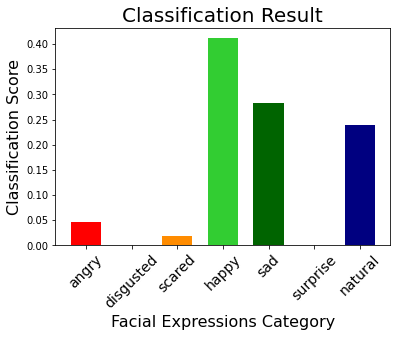


Classification result with the highest rate: happy


In [ ]:
predict_file('elon2.png')

[[2.4228028e-04 8.2638013e-07 4.0915729e-05 9.7475922e-01 1.7316973e-04
  3.3897857e-05 2.4749780e-02]]


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


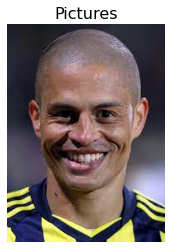

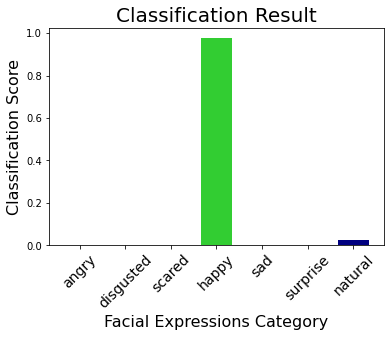


Classification result with the highest rate: happy


In [ ]:
predict_file('alex.png')

[[1.1030028e-01 7.1268743e-03 1.5547648e-01 5.9283073e-03 7.0837915e-01
  1.1134158e-04 1.2677551e-02]]


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


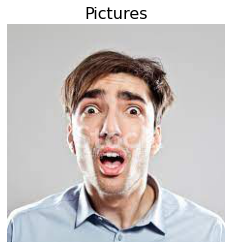

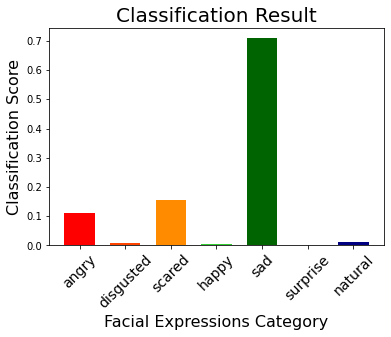


Classification result with the highest rate: sad


In [ ]:
predict_file('korkmuş.png')

[[8.3023869e-03 2.6983455e-05 7.6189891e-02 2.0752633e-02 8.6386025e-01
  1.3549972e-04 3.0732328e-02]]


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


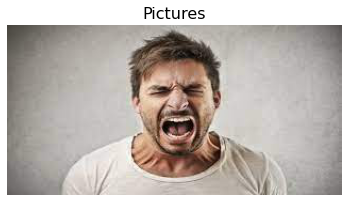

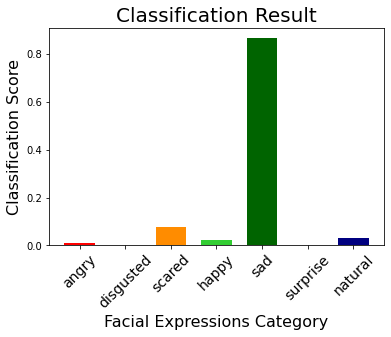


Classification result with the highest rate: sad


In [ ]:
predict_file('kızgın.png')

[[3.2428339e-02 3.4039502e-05 6.4051136e-02 4.8445910e-02 4.9835065e-01
  1.0691178e-03 3.5562089e-01]]


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


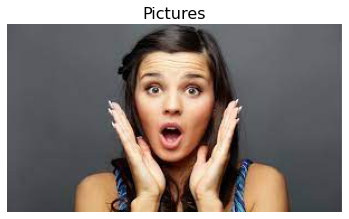

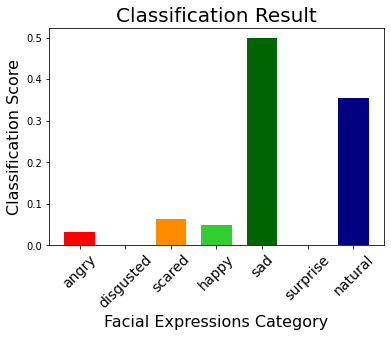


Classification result with the highest rate: sad


In [ ]:
predict_file('şaşırmış.png')